Week 1

Day 3

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\acer\Desktop\Infinity AI Work\InfinityStyleVerse\data\raw\product_esg.csv')

In [3]:
# This will calculate the sustainability score
def calculate_esg(row):
    score = 0
    
    # Material sustainability - 30 points
    sustainable_materials = ['organic cotton', 'hemp', 'recycled cotton', 'recycled polyester', 'linen']
    if row['material'] in sustainable_materials:
        score += 30
    
    # Water usage - 20 points if below 1000 liters, scaled otherwise
    water_threshold = 1000 
    if pd.notna(row['water_use']) and row['water_use'] < water_threshold:
        score += 20
    elif pd.notna(row['water_use']):
        # Scaling water score inversely (max 20 at 0 liters, 0 at 3000+)
        water_score = max(0, 20 - (row['water_use'] / 150)) 
        score += water_score
    
    # Carbon emission - 20 points if below 10 kg 
    if pd.notna(row['carbon_emission']) and row['carbon_emission'] < 10:
        score += 20
    
    # Recyclable - 20 points
    if row['recyclable'] == 'Yes':
        score += 20
    
    # Ethical rating - max 30 points, scaled from 1-5
    if pd.notna(row['ethical_rating']):
        ethical_score = min(5, row['ethical_rating']) * 6  
        score += ethical_score
    
    # Ensuring score doesn't exceed 100
    return min(100, score)

In [4]:
# Testing with 3 rows
test_rows = [0, 1, 3]  
for idx in test_rows:
    row = df.iloc[idx]
    esg_score = calculate_esg(row)
    print(f"Product ID: {row['product_id']}, Material: {row['material']}, Country: {row['country']}, Water Use: {row['water_use']}, Carbon Emission: {row['carbon_emission']}, Recyclablility: {row['recyclable']}, Ethical Rating: {row['ethical_rating']}, Score: {esg_score}")

Product ID: 1, Material: cotton, Country: India, Water Use: 2700, Carbon Emission: 15.5, Recyclablility: No, Ethical Rating: 2, Score: 14.0
Product ID: 2, Material: polyester, Country: China, Water Use: 10, Carbon Emission: 25.0, Recyclablility: No, Ethical Rating: 1, Score: 26
Product ID: 4, Material: recycled polyester, Country: Bangladesh, Water Use: 5, Carbon Emission: 8.0, Recyclablility: Yes, Ethical Rating: 3, Score: 100


Day 4

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\acer\AppData\Local\Temp\ipykernel_10824\4231827216.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='material', y='esg_score', data=df, estimator='mean', ci=None)


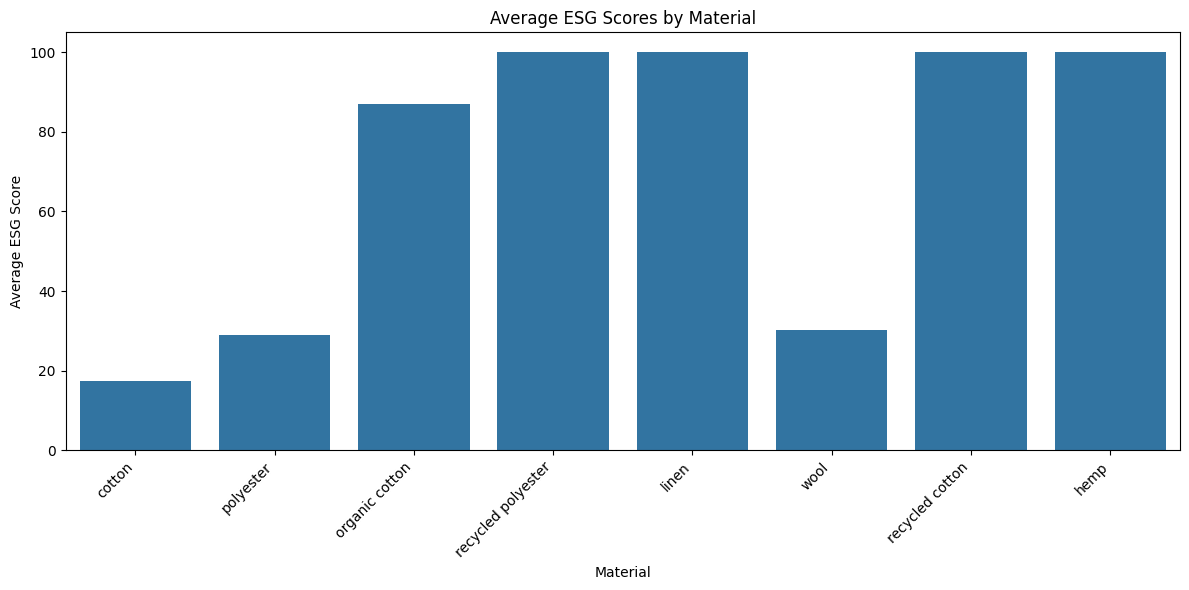

C:\Users\acer\AppData\Local\Temp\ipykernel_10824\4231827216.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='esg_score', data=df, estimator='mean', ci=None)


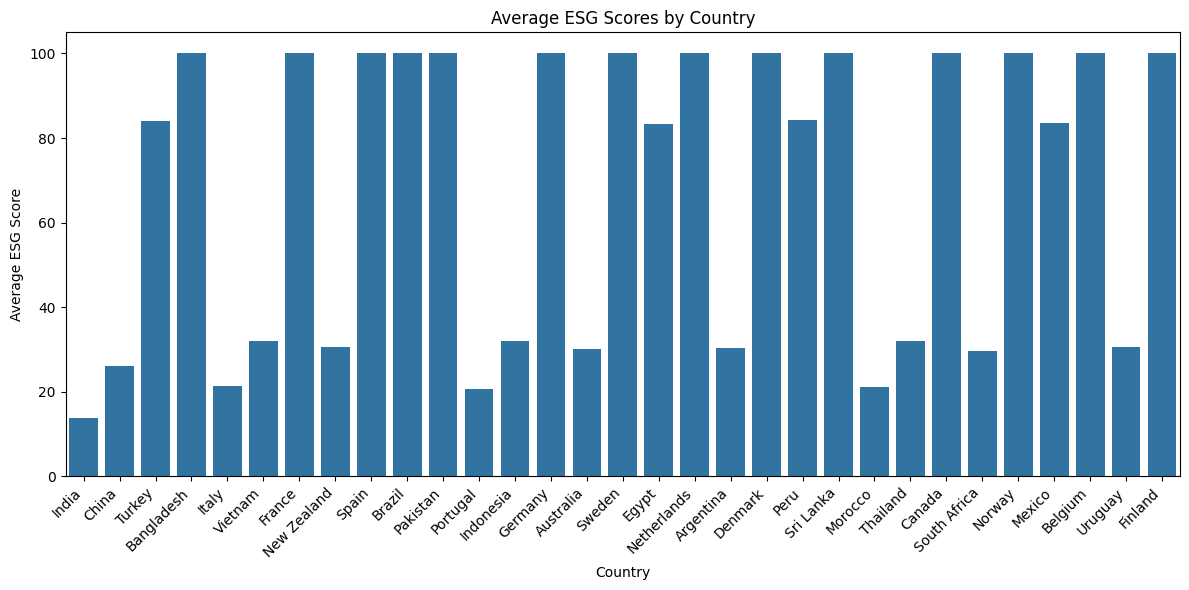

In [ ]:
# Applying the function to the entire data frame
df['esg_score'] = df.apply(calculate_esg, axis=1)

# Visualize ESG scores by material
plt.figure(figsize=(12, 6))
sns.barplot(x='material', y='esg_score', data=df, estimator='mean', ci=None)
plt.title('Average ESG Scores by Material')
plt.xlabel('Material')
plt.ylabel('Average ESG Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize ESG scores by country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='esg_score', data=df, estimator='mean', ci=None)
plt.title('Average ESG Scores by Country')
plt.xlabel('Country')
plt.ylabel('Average ESG Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
# Top sustainable materials
top_materials = df.groupby('material')['esg_score'].mean().sort_values(ascending=False).head(3)
print("Top 3 sustainable materials (average ESG score):")
print(top_materials)
print()

# Least eco-friendly items
least_eco_friendly = df.nsmallest(3, 'esg_score')[['product_id', 'material', 'country', 'esg_score']]
print("Least eco-friendly items (lowest ESG scores):")
print(least_eco_friendly)
print()

# Average ESG score by country
avg_score_by_country = df.groupby('country')['esg_score'].mean().sort_values(ascending=False)
print("Average ESG score by country:")
print(avg_score_by_country)
print()


Top 3 sustainable materials (average ESG score):
material
hemp               100.0
linen              100.0
recycled cotton    100.0
Name: esg_score, dtype: float64

Least eco-friendly items (lowest ESG scores):
    product_id material country  esg_score
9           10   cotton   India  13.333333
18          19   cotton   India  13.666667
0            1   cotton   India  14.000000

Average ESG score by country:
country
Finland         100.000000
Norway          100.000000
Netherlands     100.000000
Spain           100.000000
Sri Lanka       100.000000
Sweden          100.000000
Germany         100.000000
France          100.000000
Pakistan        100.000000
Denmark         100.000000
Canada          100.000000
Brazil          100.000000
Belgium         100.000000
Bangladesh      100.000000
Peru             84.333333
Turkey           84.000000
Mexico           83.666667
Egypt            83.333333
Thailand         32.000000
Vietnam          32.000000
Indonesia        32.000000
New Zealan